# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


---

**Баллы за задание:**

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (учитывается только в основной части курса, необходимо на "отл"):
* Задача 1 &mdash; 70 баллов

<b><a href="#Факультативная-часть" style="text-decoration: none;"><font color="green">Факультативная часть</font></a></b> (учитывается только в факультативной части курса):
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов

**Внимание!** Указанные баллы являются бонусными. Они не учитываются в максимальных суммах баллов в знаменателе при вычислении процента выполненных заданий. Но все полученные вами баллы будут учтены в числителе. Тем самым, выполняя или не выполняя домашку, вы не сможете понизить оценку, но сможете ее повысить.

In [485]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [75]:
import requests
from time import sleep
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from collections import Counter
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso
from sklearn import metrics
import optuna
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re
optuna.logging.set_verbosity(optuna.logging.WARNING)
with open("../hw2/token.txt", "r") as f:
    px.set_mapbox_access_token(f.read())

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [487]:
# URL = "https://api.hh.ru/vacancies"

# params = {
#     "text": "Data Scientist",
#     "area": 1,
#     "page": 0,
#     "per_page": 10,
# }

# req = requests.get(URL, params)
# data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [488]:
# data.keys()

Можем посмотреть на краткое описание первой вакансии

In [489]:
# data["items"][0]

Сколько всего найдено вакансий

In [490]:
# data["found"]

Количество страниц в результатах поиска

In [491]:
# data["pages"]

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [492]:
# df = pd.json_normalize(data["items"])
# df.head()

Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [493]:
# vacancy = df["id"].iloc[0]
# vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

# req = requests.get(vacancy_url)
# vacancy_info = json.loads(req.content.decode())

In [494]:
# vacancy_info

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   



Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [495]:
if os.path.exists('vacancies.csv'):
    df = pd.read_csv('vacancies.csv')

else:
    dfs = []
    keywords = ['Data Scientist','Data Science','Big Data','Data Analyst','ML Engineer','ML','DS','ML/DS','ML\DS','Computer Vision','NLP','LLM','AI','Аналитик данных','ML инженер']
    for text in tqdm(keywords):
        data = json.loads(requests.get("https://api.hh.ru/vacancies", {"text": text, "area": 1, "page": 0, "per_page": 20}).content.decode())
        for page in range(data['pages']):
            sleep(2)
            data = json.loads(requests.get("https://api.hh.ru/vacancies", {"text": text, "area": 1, "page": page, "per_page": 20}).content.decode())
            dfs.extend(pd.json_normalize(data)["items"][0])   
    df = pd.concat([pd.DataFrame({k:[str(v)] for k,v in x.items()}) for x in dfs]).reset_index().drop('index', axis=1)
    df.to_csv('vacancies.csv', index=False)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [496]:
print(len(df), end=' -> ')
df.drop_duplicates(inplace=True)
print(len(df))

9958 -> 8384


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [497]:
if os.path.exists('vacancies_full.csv'):
    df = pd.read_csv('vacancies_full.csv')

else:
    dfs = []
    for i in tqdm(df.index):
        sleep(1.5)
        vacancy_info = json.loads(requests.get(f"https://api.hh.ru/vacancies/{df.loc[i]['id']}").content.decode())
        for key in vacancy_info.keys():
            if type(vacancy_info[key]) == dict and 'name' in vacancy_info[key].keys():
                vacancy_info[key] = vacancy_info[key]['name']
            if type(vacancy_info[key]) == list:
                vacancy_info[key] = [elem['name'] for elem in vacancy_info[key]]
        dfs.append(pd.DataFrame({k:[str(v)] for k,v in vacancy_info.items()}))
    df = pd.concat(dfs).reset_index()

    df.drop(['index'], axis=1, inplace=True)
    for col in df.columns:  
        if 'url' in col:
            df.drop(col, axis=1, inplace=True)  # дропаем заведомо лишние столбцы со ссылками
    df.to_csv('vacancies_full.csv', index=False)

In [498]:
# частичная обработка признаков (для следующих заданий это не требуется явно, но это в любом случае полезно)

stop_words = ['контент','content','продаж','sales','дизайн','design','архитектор','декоратор','девопс','devops','визуализатор','php','golang',
  'координатор','программист','менеджер','manager','копирайтер','разработчик','developer','консультант','проектировщик','помощник','рекрутер',
  'бухгалтер','юрист','owner','преподаватель','креатив','конструктор','сервис','оператор','аудит','тестировщик','seo','администра','таргет',
  'экономист','заведующий','ценообраз','сейл','ревизор','казначей','писатель','ассистент рук','3d']
df['rubbish'] = df.name.apply(lambda x: any([word in x.lower() for word in stop_words]))  # отсеем мусорные вакансии по ключевым стоп-словам
df = df[~df.rubbish]

for sub_feature in ['from','to','currency','gross']:  # признаки из зарплаты
    df[f'salary_{sub_feature}'] = df.salary.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)[sub_feature])
df.salary_gross = df.salary_gross.apply(lambda x: str(x).lower()=='true')  # gross - до удержания ндфл, net - после
df.salary_currency = df.salary_currency.apply(lambda x: 'RUR' if str(x).lower()=='nan' else str(x))  # по умолчанию считаем, что даны рубли
for salary in ['salary_from','salary_to']:  # приведем все к net и в рубли
    df[salary] = df[[salary,'salary_currency']].apply(lambda x: float(x[salary]) * {'RUR':1,'USD':91.6,'EUR':98.7}[x['salary_currency']], axis=1)  # курс на 05.05.24
    df[salary] = df[[salary,'salary_gross']].apply(lambda x: float(x[salary]) if x['salary_gross'] else float(x[salary]) * 0.87, axis=1)  # считаем ставку ндфл 13%
df['salary_from'] = df[['salary_from','salary_to']].apply(lambda x: x.salary_from if x.salary_from>0 else x.salary_to, axis=1)  # пропуски
df['salary_to'] = df[['salary_from','salary_to']].apply(lambda x: x.salary_to if x.salary_to>0 else x.salary_from, axis=1)

for sub_feature in ['city','street','building','lat','lng']:  # выделим только важное (станции метро, вероятно, не критичны, когда есть координаты)
    df[f'address_{sub_feature}'] = df.address.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)[sub_feature])
df = df[((df.address_lat > 55.5) & (df.address_lat < 56.0) & (df.address_lng > 37.2) & (df.address_lng < 38.0)) | (df.address_lng.isna())]  # уберем заведомо немосковские вакансии

df['anonymous'] = df.type.apply(lambda x: x.lower() == 'анонимная')  # получим естественный бинарный признак
df['test_required'] = df.test.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)['required']==True)  # тут тоже
df['experience'] = df.experience.apply(lambda x: {'Нет опыта':0,'От 1 года до 3 лет':1,'От 3 до 6 лет':2,'Более 6 лет':3}[x])  # определен порядок, кодируем напрямую

all_languages = []  # 1-hot кодируем языки (для навыков ниже будет аналогично)
for lang in df.languages.unique():
    all_languages.extend(eval(lang))
all_languages = list(set(all_languages))
for lang in all_languages:
    df[f'languages_{lang.replace(" ","_")}'] = df.languages.apply(lambda x: lang in x)  

for bin_feature in ['premium','response_letter_required','allow_messages','accept_handicapped','accept_kids',
 'archived','accept_incomplete_resumes','has_test','accept_temporary','approved']:
    df[bin_feature] = df[bin_feature].apply(lambda x: str(x).lower()=='true')  # конвертируем в bool, что можно
for useless_feature in ['relations','insider_interview','area','salary','address','contacts','branded_description','vacancy_constructor_template',
 'specializations','code','hidden','quick_responses_allowed', 'driver_license_types','type','languages','rubbish']:  
    df.drop(useless_feature, axis=1, inplace=True)  # дропнем бесполезные признаки (c 1 уник. значением, просто ссылками, мусорные или обработанные)

*Почему-то в данных было очень много мусорных вакансий. Возможно, hr-ы добавляют в описания вакансий модные слова (big data, ai, ...) просто для привлечения внимания*

In [499]:
df.to_excel("vacancies_full_processed.xlsx", sheet_name='vacancies', index=False)  
df.shape 

(5014, 45)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [500]:
print(f'Нашлось {df.shape[0]} уникальных вакансий')

Нашлось 5014 уникальных вакансий


*Промежуточный вывод: даже с учетом того, что в выдачу могли попасть "лишние" вакансии, все равно московских вакансий в сфере Data Science довольно много, что говорит о популярности профессии*

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

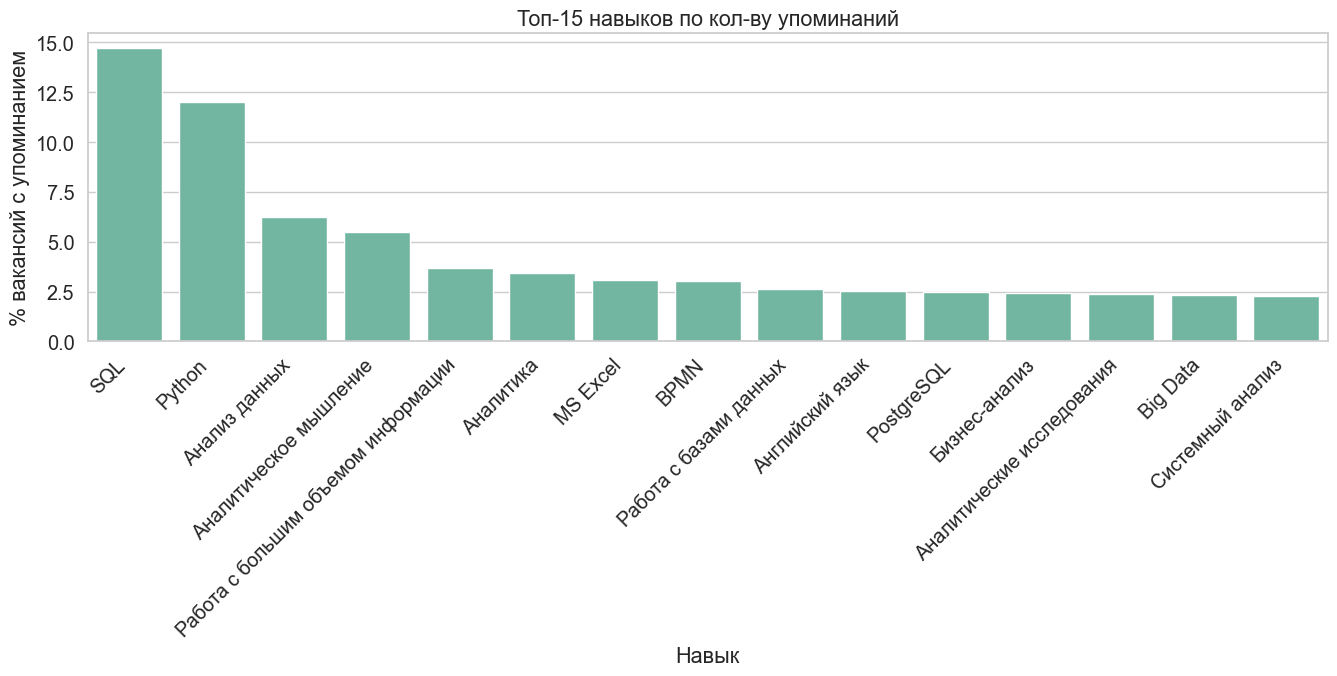

In [501]:
all_skills = []
for skill in df.key_skills.unique():
    all_skills.extend(eval(skill))
all_skills = dict(Counter(all_skills).most_common(15))

plt.figure(figsize=(16,4))
plt.title('Топ-15 навыков по кол-ву упоминаний')
plt.xlabel('Навык')
plt.ylabel('% вакансий с упоминанием')
plt.xticks(rotation=45, horizontalalignment='right')
sns.barplot(x=all_skills.keys(), y=np.array(list(all_skills.values()))/df.shape[0]*100)
plt.show()

*Промежуточный вывод: самые востребованные навыки - базы данных (SQL, Posgres, ...), языки программирования (Python, и я удивлен, что нет C++\R), мета-предметные и гуманитарные навыки (аналитическое мышление, английский, ...)*

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму. При работе с данными о ЗП обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

*При обработке данных (выше), зарплаты уже были переведены в рубли (по курсу 05.05.24) и net (уплачен ндфл 13%)*

In [502]:
len(df[df.salary_to >= 1e6])  # несколько вакансий, где верхний порог >= 1млн: отсеем их, как выбросы

4

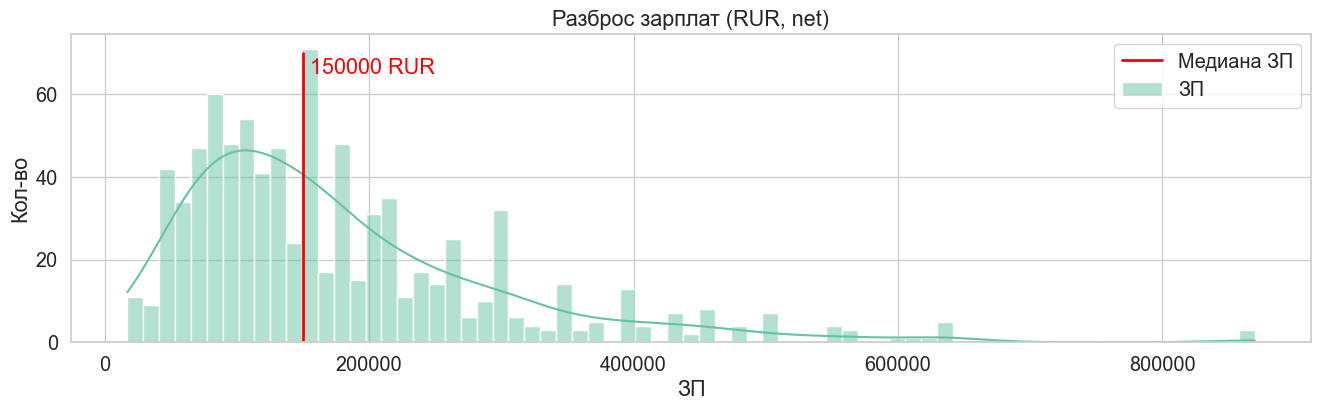

In [503]:
plt.figure(figsize=(16,4))
plt.title('Разброс зарплат (RUR, net)')
plt.xlabel('ЗП')
plt.ylabel('Кол-во')
df['salary_mean'] = (df['salary_to'] + df['salary_from']) / 2  # оценим ожидаемую ЗП как среднее по вилке
df_crop = df[(df.salary_from < 1e6) & (df.salary_mean < 1e6) & (df.salary_to < 1e6)]
sns.histplot(df_crop, x='salary_mean', binwidth=1.2e4, label='ЗП', kde=True)
sns.lineplot(x=[df_crop.salary_mean.median()]*2, y=[0,70], color='red', label='Медиана ЗП', estimator=None, linewidth=2)
plt.text(df_crop.salary_mean.median()+5000,65,f"{round(df_crop.salary_mean.median())} RUR", color='red')
plt.legend()
plt.show()

*Промежуточный вывод: медианная зарлпата равна 150000 руб, что заметно больше средней ЗП в России и говорит о высоком спросе на специалистов в данной области. Наверняка правый хвост распределения соответствует специалистам senior\lead уровня, а левый - junior\intern*

**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

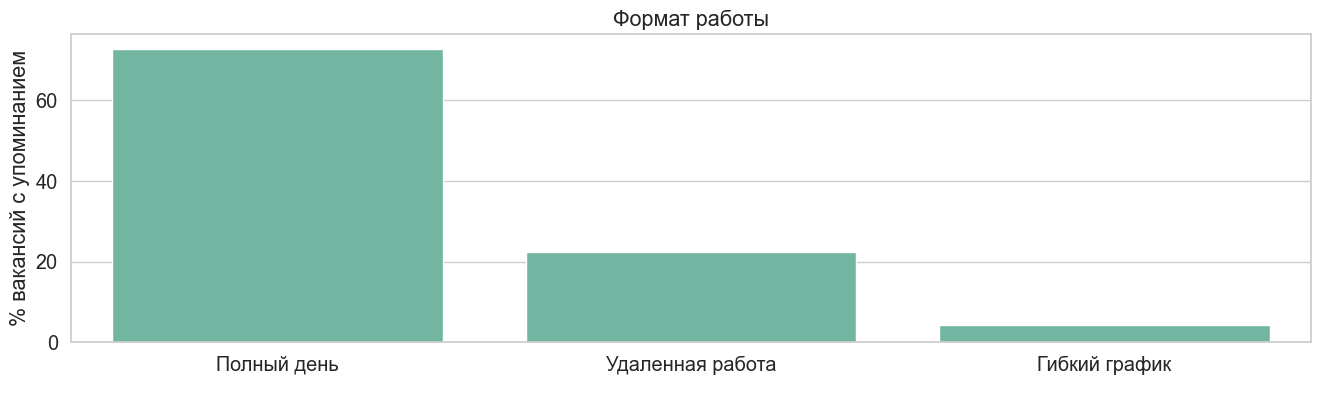

In [504]:
plt.figure(figsize=(16,4))
plt.title('Формат работы')
plt.xlabel(' ')
plt.ylabel('% вакансий с упоминанием')
grouped = df.schedule.value_counts(normalize=True)*100
grouped = grouped[grouped > 1]  # сменный график - 0.3%, вахтовый метод - 0.02%, уберем
sns.barplot(x=grouped.index, y=grouped)
plt.show()

*Промежуточный вывод: около четверти всех вакансий позволяют удаленную работу (что логично, учитывая специфику профессии)*

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

*Посмотрим вакансии Backend-разработчиков в Москве*

In [505]:
if os.path.exists('vacancies_new.csv'):
    df = pd.read_csv('vacancies_new.csv')

else:
    dfs = []
    keywords = ['Backend','Backend-разработчик','Backend Developer']
    for text in tqdm(keywords):
        data = json.loads(requests.get("https://api.hh.ru/vacancies", {"text": text, "area": 1, "page": 0, "per_page": 20}).content.decode())
        for page in range(data['pages']):
            sleep(2)
            data = json.loads(requests.get("https://api.hh.ru/vacancies", {"text": text, "area": 1, "page": page, "per_page": 20}).content.decode())
            dfs.extend(pd.json_normalize(data)["items"][0])   
    df = pd.concat([pd.DataFrame({k:[str(v)] for k,v in x.items()}) for x in dfs]).reset_index().drop('index', axis=1)
    df.to_csv('vacancies_new.csv', index=False)

In [506]:
print(len(df), end=' -> ')
df.drop_duplicates(inplace=True)
print(len(df))

4913 -> 4267


In [507]:
if os.path.exists('vacancies_new_full.csv'):
    df = pd.read_csv('vacancies_new_full.csv')

else:
    dfs = []
    for i in tqdm(df.index):
        sleep(1.5)
        vacancy_info = json.loads(requests.get(f"https://api.hh.ru/vacancies/{df.loc[i]['id']}").content.decode())
        for key in vacancy_info.keys():
            if type(vacancy_info[key]) == dict and 'name' in vacancy_info[key].keys():
                vacancy_info[key] = vacancy_info[key]['name']
            if type(vacancy_info[key]) == list:
                vacancy_info[key] = [elem['name'] for elem in vacancy_info[key]]
        dfs.append(pd.DataFrame({k:[str(v)] for k,v in vacancy_info.items()}))
    df = pd.concat(dfs).reset_index()

    df.drop(['index'], axis=1, inplace=True)
    for col in df.columns:  
        if 'url' in col:
            df.drop(col, axis=1, inplace=True)  # дропаем заведомо лишние столбцы со ссылками
    df.to_csv('vacancies_new_full.csv', index=False)

In [508]:
stop_words = ['контент','content','продаж','sales','дизайн','design','архитектор','декоратор','девопс','devops','визуализатор','координатор','менеджер',
  'manager','копирайтер','консультант','помощник','рекрутер','бухгалтер','юрист','owner','преподаватель','креатив','конструктор','сервис','оператор',
  'аудит','тестировщик','seo','администра','таргет','экономист','заведующий','ценообраз','сейл','ревизор','казначей','писатель','ассистент рук','3d']
df['rubbish'] = df.name.apply(lambda x: any([word in x.lower() for word in stop_words]))  # отсеем мусорные вакансии по стоп-словам (список другой, но перескается, на всякий случай)
df = df[~df.rubbish]

for sub_feature in ['from','to','currency','gross']:  # признаки из зарплаты
    df[f'salary_{sub_feature}'] = df.salary.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)[sub_feature])
df.salary_gross = df.salary_gross.apply(lambda x: str(x).lower()=='true')  # gross - до удержания ндфл, net - после
df.salary_currency = df.salary_currency.apply(lambda x: 'RUR' if str(x).lower()=='nan' else str(x))  # по умолчанию считаем, что даны рубли
for salary in ['salary_from','salary_to']:  # приведем все к net и в рубли
    df[salary] = df[[salary,'salary_currency']].apply(lambda x: float(x[salary]) * {'RUR':1,'USD':91.6,'EUR':98.7}[x['salary_currency']], axis=1)  # курс на 05.05.24
    df[salary] = df[[salary,'salary_gross']].apply(lambda x: float(x[salary]) if x['salary_gross'] else float(x[salary]) * 0.87, axis=1)  # считаем ставку ндфл 13%
df['salary_from'] = df[['salary_from','salary_to']].apply(lambda x: x.salary_from if x.salary_from>0 else x.salary_to, axis=1)  # пропуски
df['salary_to'] = df[['salary_from','salary_to']].apply(lambda x: x.salary_to if x.salary_to>0 else x.salary_from, axis=1)

for sub_feature in ['city','street','building','lat','lng']:  # выделим только важное (станции метро, вероятно, не критичны, когда есть координаты)
    df[f'address_{sub_feature}'] = df.address.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)[sub_feature])
df = df[((df.address_lat > 55.5) & (df.address_lat < 56.0) & (df.address_lng > 37.2) & (df.address_lng < 38.0)) | (df.address_lng.isna())]  # уберем заведомо немосковские вакансии

df['anonymous'] = df.type.apply(lambda x: x.lower() == 'анонимная')  # получим естественный бинарный признак
df['test_required'] = df.test.astype(str).apply(lambda x: np.nan if x=='nan' or type(eval(x)) != dict else eval(x)['required']==True)  # тут тоже
df['experience'] = df.experience.apply(lambda x: {'Нет опыта':0,'От 1 года до 3 лет':1,'От 3 до 6 лет':2,'Более 6 лет':3}[x])  # определен порядок, кодируем напрямую

all_languages = []  # 1-hot кодируем языки (для навыков ниже будет аналогично)
for lang in df.languages.unique():
    all_languages.extend(eval(lang))
all_languages = list(set(all_languages))
for lang in all_languages:
    df[f'languages_{lang.replace(" ","_")}'] = df.languages.apply(lambda x: lang in x)  

for bin_feature in ['premium','response_letter_required','allow_messages','accept_handicapped','accept_kids',
 'archived','accept_incomplete_resumes','has_test','accept_temporary','approved']:
    df[bin_feature] = df[bin_feature].apply(lambda x: str(x).lower()=='true')  # конвертируем в bool, что можно
for useless_feature in ['relations','insider_interview','area','salary','address','contacts','branded_description','vacancy_constructor_template',
 'specializations','code','hidden','quick_responses_allowed', 'driver_license_types','type','languages','rubbish']:  
    df.drop(useless_feature, axis=1, inplace=True)  # дропнем бесполезные признаки (c 1 уник. значением, просто ссылками, мусорные или обработанные)

In [509]:
df.to_excel("vacancies_new_full_processed.xlsx", sheet_name='vacancies_new', index=False)  
df.shape 

(3732, 41)

In [510]:
print(f'Нашлось {df.shape[0]} уникальных вакансий')

Нашлось 3732 уникальных вакансий


*Промежуточный вывод: вакансий для backend-разработчиков нашлось меньше, чем для дата-саентистов. Однако, нельзя сделать вывод, что профессия backend-разработчика менее востребована: возможно, если поискать по более специфичным ключевым словам (php, laravel, ...) найдется даже больше вакансий. Но для некоторой грубой оценки текущих данных достаточно*

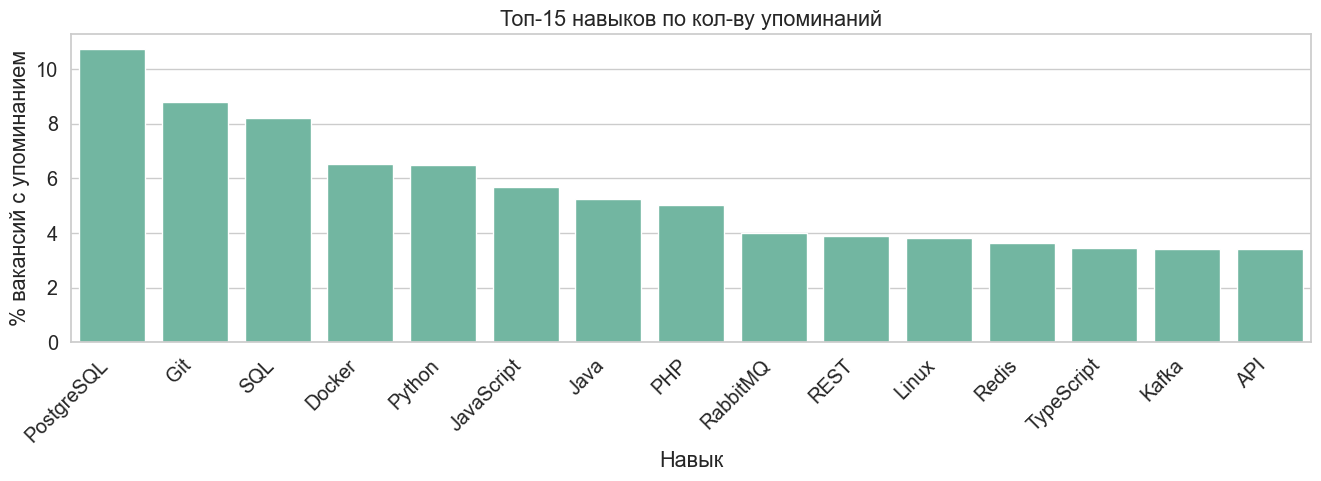

In [511]:
all_skills = []
for skill in df.key_skills.unique():
    all_skills.extend(eval(skill))
all_skills = dict(Counter(all_skills).most_common(15))

plt.figure(figsize=(16,4))
plt.title('Топ-15 навыков по кол-ву упоминаний')
plt.xlabel('Навык')
plt.ylabel('% вакансий с упоминанием')
plt.xticks(rotation=45, horizontalalignment='right')
sns.barplot(x=all_skills.keys(), y=np.array(list(all_skills.values()))/df.shape[0]*100)
plt.show()

*Промежуточный вывод: самые востребованные навыки - исключительно технические (в отличие от data science, где было много навыков наподобие "аналитическое мышление", "делловая коммуникация"). Возможно, сфера backend существует значительно дольше, и hr-ы уверены, о каком стеке технологий стоит опрашивать соискателей*

In [512]:
len(df[df.salary_to >= 1e6])  # несколько вакансий, где верхний порог >= 1млн: отсеем их, как выбросы

5

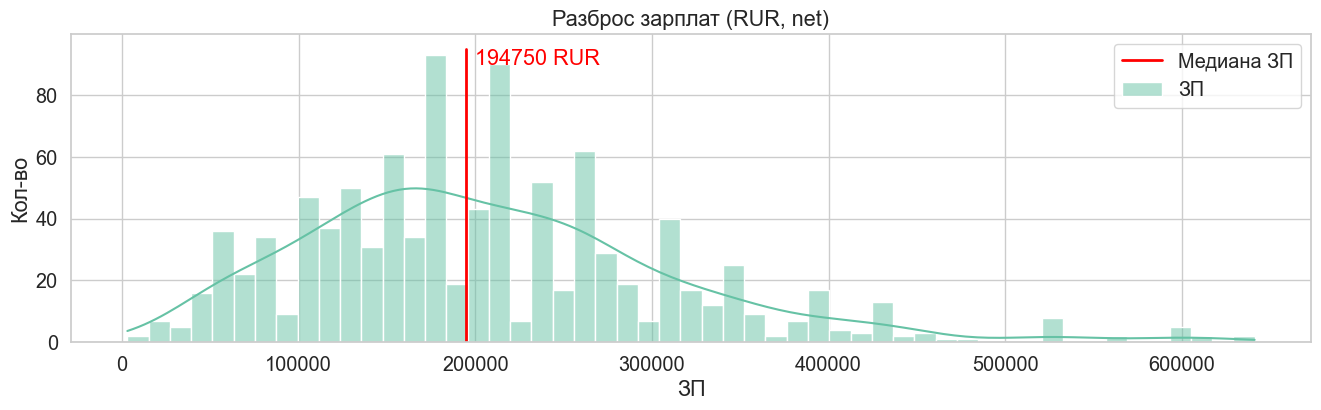

In [513]:
plt.figure(figsize=(16,4))
plt.title('Разброс зарплат (RUR, net)')
plt.xlabel('ЗП')
plt.ylabel('Кол-во')
df['salary_mean'] = (df['salary_to'] + df['salary_from']) / 2  # оценим ожидаемую ЗП как среднее по вилке
df_crop = df[(df.salary_from < 1e6) & (df.salary_mean < 1e6) & (df.salary_to < 1e6)]
sns.histplot(df_crop, x='salary_mean', binwidth=1.2e4, label='ЗП', kde=True)
sns.lineplot(x=[df_crop.salary_mean.median()]*2, y=[0,90], color='red', label='Медиана ЗП', estimator=None, linewidth=2)
plt.text(df_crop.salary_mean.median()+5000,85,f"{round(df_crop.salary_mean.median())} RUR", color='red')
plt.legend()
plt.show()

*Промежуточный вывод: медианная зарплата равна 194750 руб, что больше медианной ЗП дата-саентистов (судя по первой половине задачи). Возможно, это снова связано с тем, что отрасль backend-а существует дольше, и среди соискателей заметно ниже доля джунов\стажеров, что и сдвигает распределение. Косвенно это подтверждается тем, что левый хвост уменьшился в сравнении с распределением для дата-саентистов, однако необходимо более тщательное исследование*

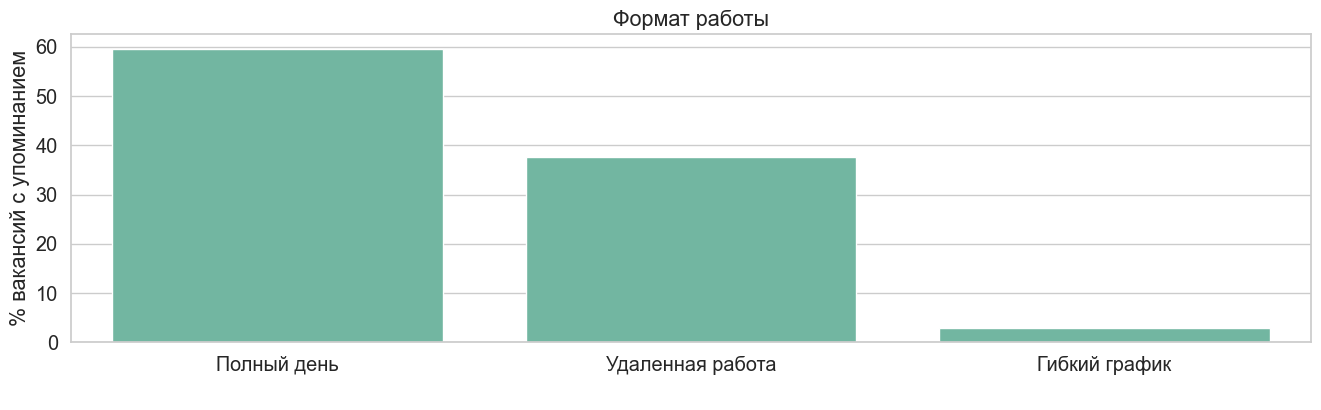

In [514]:
plt.figure(figsize=(16,4))
plt.title('Формат работы')
plt.xlabel(' ')
plt.ylabel('% вакансий с упоминанием')
grouped = df.schedule.value_counts(normalize=True)*100
grouped = grouped[grouped > 1]  # сменный график - 0.3%, вахтовый метод - 0.02%, уберем
sns.barplot(x=grouped.index, y=grouped)
plt.show()

*Промежуточный вывод: более трети всех вакансий позволяют удаленную работу. Вероятно, переход на удаленный формат - это общий тренд для всех IT-профессий*

Не забывайте про выводы.

*Вывод: в рамках задачи удалось исследовать состояние московского рынка выкансий в сферах data science и backend. В обоих случаях работодатели готовы платить ЗП, значительно превышающую среднюю по России, а также часто допускают удаленную работу, что говорит о высоком спросе на IT-специалистов в целом. Ключевые требуемые навыки для backend-еров - в основном технические, а для дата-саентистов - технические и мета-предметные, что может указывать на разнообразие задач в data science и, как следствие, потребность в разносторонних сотрудниках*


---

### <font color="green"><i>Факультативная часть</i></font>




---

### Задача 2.   



Для *одной* из рассмотренных ранее профессий исследуйте, в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом.
Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.

*Посмотрим для вакансий в data science*

In [515]:
df = pd.read_excel("vacancies_full_processed.xlsx", sheet_name='vacancies')[['name','address_lat','address_lng','salary_from','salary_to']]
df = df.rename(columns={'address_lat':'lat','address_lng':'lng'})
print(len(df), end=' -> ')
df = df[~df.lat.isna()]  # оставим только записи, где доступны координаты. Отдельно смотрел: по адресу получить больше координат не получилось бы
print(len(df))
df['salary_mean'] = (df['salary_to'] + df['salary_from']) / 2
df['log_salary_mean'] = np.log(df['salary_mean'])
for coord in ['lat','lng']:
    df[f"{coord}_rounded"] = np.round(df[coord] * 4, decimals=1) * 0.25  # условные "районы" города получим в виде клеток (как в дз2)

5014 -> 1933


In [516]:
fig = px.scatter_mapbox(
    df[~df.salary_mean.isna()],
    lat="lat",
    lon="lng",
    color="log_salary_mean",
    hover_name="name",
    title="Карта московских вакансий в data science (log цвет)",
    size_max=15,
    zoom=10
)
# fig.show()
fig.write_html("1.Карта московских вакансий в data science.html")  # прикрепил отдельным файлом

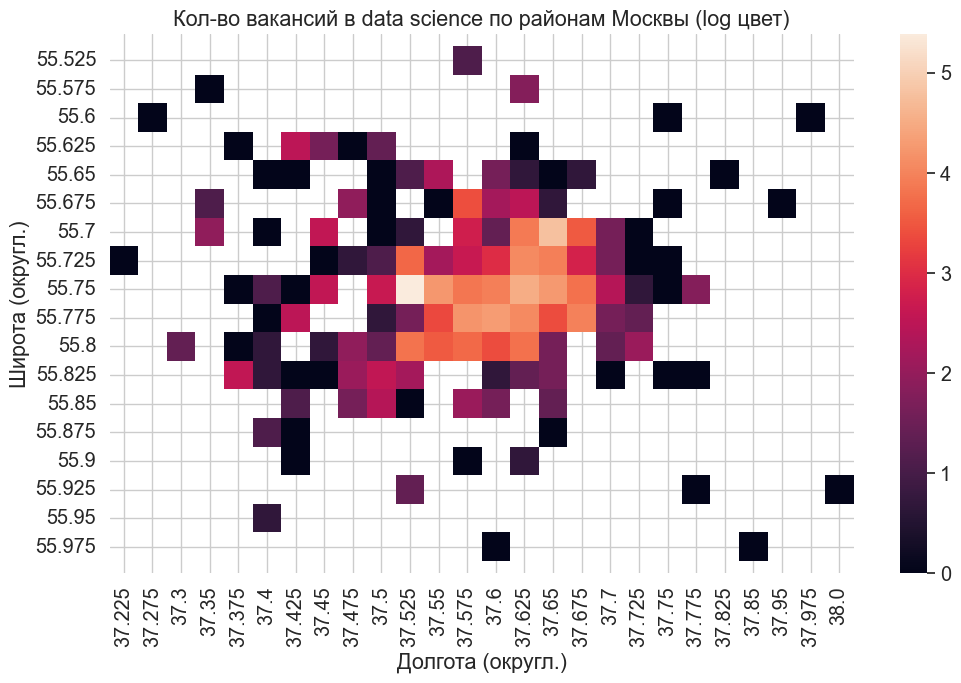

In [517]:
plt.figure(figsize=(12,7))
plt.axis("equal")
pivot = pd.pivot_table(
    df,
    index="lat_rounded",
    columns="lng_rounded",
    values="name",
    aggfunc='count',
)
pivot = np.log(pivot)
fig = sns.heatmap(pivot).set(
    title="Кол-во вакансий в data science по районам Москвы (log цвет)",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

Какие выводы можно сделать из построенных графиков?

*Видно, что в центре и на северо-западе Москвы и больше вакансий, и выше зарплаты. Исторически, восток столицы был промзоной, поэтому офисы крупных компаний (которые готовы платить соискателям больше) расположены в центре или на западе.*

---

### Задача 3.   

**1.** Проверьте, во скольких вакансиях среди выгруженных указана зарплата?


In [76]:
df = pd.read_excel("vacancies_full_processed.xlsx", sheet_name='vacancies')[['salary_to','salary_from','description']]
df['data'] = df['description'].apply(lambda x: re.sub(r"<[a-z]*>|</[a-z]*>", "", x.lower()))  # regex удалит html-теги
df['target'] = (df['salary_to'] + df['salary_from']) / 2
df.drop(['salary_to','salary_from','description'], inplace=True, axis=1)
print(f'{len(df)} -> {len(df[~df.target.isna()])}')  # посчитаем записи, где известна ЗП, но пока ничего не удаляем 

5014 -> 851


*В данных много пропусков (всего 851 запись из 5014 содержит сведения о ЗП), но работаем с тем, что есть(*

На основе описания вакансий с известной зарплатой попробуйте оценить ожидаемую зарплату для всех остальных вакансий. Для этого на основе текстового описания вакансии можно построить эмбеддинги (любые подходящие нейросетевые или просто one-hot кодирование). По этим эмбеддингам обучите некоторую модель предсказывать зарплату. 

Не забудьте по общий пайплайн ML-моделей, а также про применимость различных методов.

*Задача: заполнить пропуски, но не константой (медианой?), а хитрее*  
*Достаточно использовать какой-нибудь простой и быстро реализуемый подход, например, линейную регрессию с L1-регуляризацией. План действий:*  
*- Разделим записи с указанной ЗП на трейн и валидацию. Отдельно обработаем записи без указанной ЗП: назовем их тестом*  
*- Обучим модель на трейне, подберем гиперпараметры на валидации*  
*- Прогоним модель на тесте, значения предсказанной ЗП сохраним в столбец с остальной ЗП*  

In [77]:
x_train, x_val, y_train, y_val = train_test_split(df[~df.target.isna()]['data'], df[~df.target.isna()]['target'], test_size=0.2, random_state=42)
train_mean, train_std = y_train.mean(), y_train.std()  # фит параметров скейлинга на трейне
y_train, y_val = (y_train-train_mean)/train_std, (y_val-train_mean)/train_std
x_test = df[df.target.isna()]['data']  # таргеты пустые по построению теста

In [78]:
def objective(trial):
    min_df = trial.suggest_float('min_df', 0.0, 0.02)
    max_df = trial.suggest_float('max_df', min_df, 0.07)  # требуем, чтобы max_df >= min_df
    alpha = trial.suggest_float('alpha', 0.1, 100.0)  # сила L1
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
    x_train_ = vectorizer.fit_transform(x_train).toarray()
    x_val_ = vectorizer.transform(x_val).toarray()
    lr = Lasso(alpha=alpha)
    lr.fit(x_train_, y_train)
    return metrics.mean_squared_error(y_val, lr.predict(x_val_))  # подбор гиперпараметров по валидации

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Лучшие гиперпараметры:', study.best_params)
print('Лучшее качество:', round(study.best_value,3))

Лучшие гиперпараметры: {'min_df': 0.005698821925060962, 'max_df': 0.0335258554768508, 'alpha': 65.89810137406504}
Лучшее качество: 0.962


*Для простой оценки значений в пропусках - достаточно) В любом случае, это лучше, чем заполнение пропусков константой*

In [79]:
vectorizer = CountVectorizer(min_df=study.best_params['min_df'], max_df=study.best_params['max_df'])
x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()
lr = Lasso(alpha=study.best_params['alpha'])
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)*train_std + train_mean  # возвращаем исходный масштаб зарплат
df.loc[df[df.target.isna()].index,'target'] = y_test_pred
assert df.isna().sum().sum() == 0

In [80]:
print(len(df), end=' -> ')
mu, sigma = df.target.mean(), df.target.std()
df = df[(df.target-mu).abs() / sigma < 5]  # уберем выбросы ЗП методом 5 сигм
print(len(df))

5014 -> 4973


**2.** Выполните кластеризацию вакансий, используя построенные эмбеддинги. Визуализируйте результаты и проинтерпретируйте кластеры.

In [81]:
all_embeddings = vectorizer.transform(df.data).toarray()
all_descriptions = df.data
all_targets = df.target  # известные значения + заполненные пропуски

pca = PCA(n_components=2)  # перед кластеризацией проецируем на подпространство меньшей размерности (сразу на плоскость)
projection = pca.fit_transform(all_embeddings)
mu, sigma = projection.mean(axis=0), projection.std(axis=0) 
kmeans = KMeans(n_clusters=3, random_state=42)  # кластеризация
clusters = kmeans.fit_predict((projection-mu)/sigma).astype(int)  # kmeans лучше работает на нормированных данных

In [82]:
all_data = pd.concat([pd.DataFrame(projection), pd.DataFrame({'target':all_targets,'cluster':clusters,'description':all_descriptions})], axis=1).dropna(how='any')
salary_by_cluster = all_data.groupby('cluster')['target'].mean().round().astype(int)
display(salary_by_cluster)

cluster
0.0    177156
1.0    180586
2.0    183603
Name: target, dtype: int32

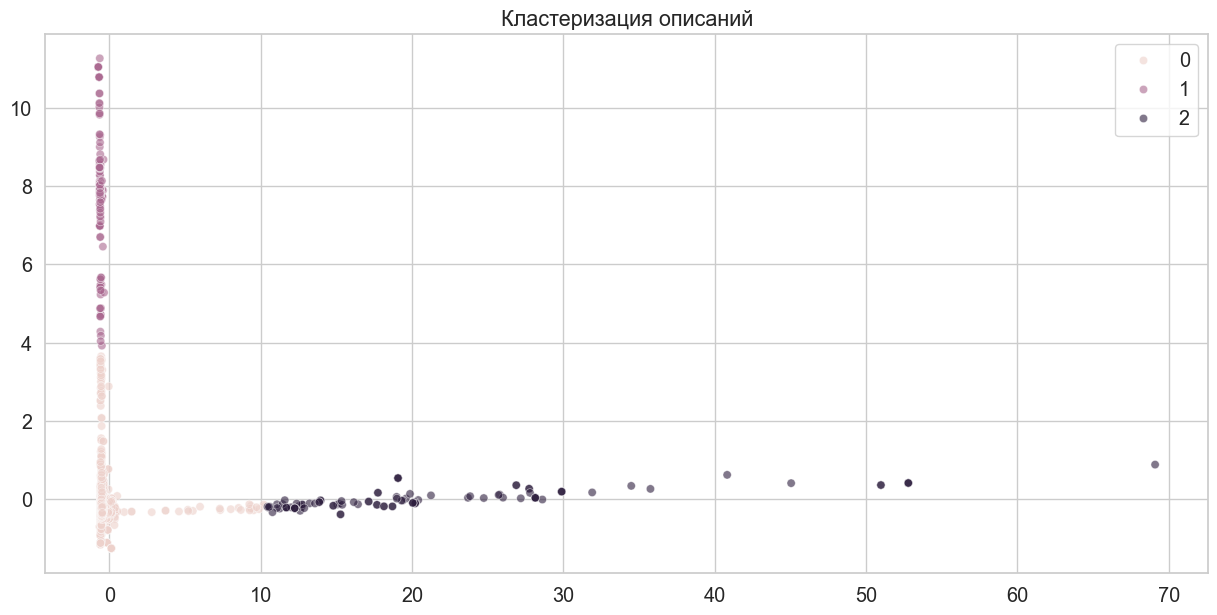

In [83]:
plt.figure(figsize=(15,7))
plt.title('Кластеризация описаний')
sns.scatterplot(x=projection[:,0], y=projection[:,1], hue=clusters, alpha=0.6)
plt.show()

In [87]:
for c in range(len(salary_by_cluster)):
    cluster = all_data[all_data.cluster == c].copy()
    centroid = cluster[[0,1]].mean(axis=0)
    cluster['dist'] = cluster.apply(lambda x: x[0]*centroid[0]+x[1]*centroid[1], axis=1)
    cluster = cluster.sort_values(by='dist', ascending=False)[:5]  # ближайшие к центроиде примеры
    print(f'{c} кластер:')
    for v in cluster.description.values:
        print(f'{v[:200]}...')
    print()

0 кластер:
сейчас команда расширяется , и мы ищем специалиста - инженера данных. чем предстоит заниматься:  развитие платформы данных, созданием инструментов обработки данных и фреймворков участие в проектах с р...
ведущий инженер по машинному обучению (senior ml engineer) на проект   обязанности:   разработка ml-модели для подсистемы контроля мошенничества (антифрод) в составе автоматизированной системы контрол...
компания норбит (входит в гк ланит), является аккредитованной ит-компанией, специализируется на разработке и внедрении эффективных решений для автоматизации бизнеса и государственного управления. в шт...
наша команда занимается оценкой защищенности всего процесса создания моделей искусственного интеллекта, от сбора датасетов до эксплуатации. в нашем фокусе прежде всего большие языковые модели (llm), г...
привет!)<br /><br />huntit - это передовое международное рекрутинговое агентство, которое специализируется на поиске и подборе высококвалифицированных специалистов в сфере i

Не забывайте про выводы.

*В пространстве эмбеддингов точки выстроились в виде двух лучей, и найденные с помощью kmeans кластеры расположились на них (по кластеру на луч + 1 центральный).*  
*Поскольку средние ЗП по кластерам очень близки, какие-либо выводы о них делать затруднительно. Однако по ближайшим к центроидам примерам опсианий видно, что:*  
*- 2 кластер - описания на английском (возможно, международные компании + ЗП в валюте)*  
*- 1 кластер - вакансии от крупных российских компаний (выделяется мтс - крупный работодатель в сфере data science)*  
*- 0 кластер - остальные описания*  
*При дальнейших исследованиях следует попробовать строить эмбеддинги с помощью нейросетей: возможно, так появится еще более понятная структура в данных*